In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [3]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

In [4]:
df.shape

(131662, 29)

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [5]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

X_centered.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
3,17.359091,3.984088,-0.003398,0.604292,-0.782838,-1.474883,0.7972,-1.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
4,10.749091,3.984088,0.233082,0.553042,3.217162,-11.474883,-2.2028,26.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [6]:
from sklearn.decomposition import PCA

### Your code is here

pca_2d = PCA(n_components=2)

pca_2d_array = pca_2d.fit_transform(X_centered)

pca_2d_df = pd.DataFrame(pca_2d_array, columns=["pca_1", "pca_2"])

pca_2d_df

,pca_1,pca_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752
...,...,...
131657,-32.267779,-2.482906
131658,32.621206,-0.886322
131659,-4.045367,-1.565545
131660,3.696395,-15.487904


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


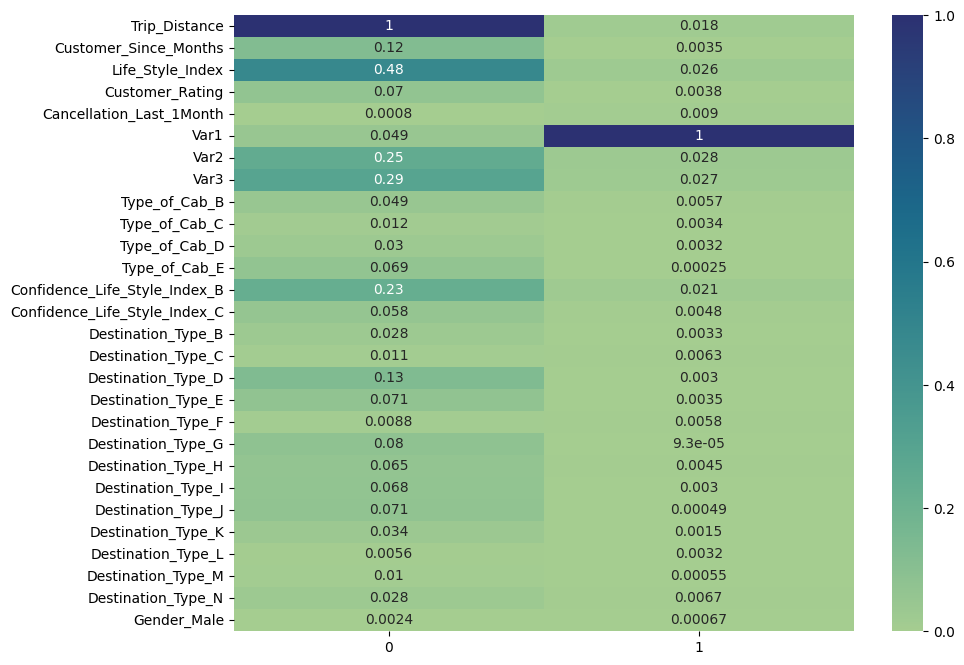

In [7]:
### Your code is here

corr_pca_1 = X.corrwith(pca_2d_df["pca_1"])
corr_pca_2 = X.corrwith(pca_2d_df["pca_2"])

corred_2d_df = pd.concat([corr_pca_1,corr_pca_2],axis=1)

plt.figure(figsize=(10,8))

sns.heatmap(abs(corred_2d_df), vmax=1, vmin=0,annot=True, cmap="crest")

plt.show()


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [8]:
pca_2d_df

,pca_1,pca_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752
...,...,...
131657,-32.267779,-2.482906
131658,32.621206,-0.886322
131659,-4.045367,-1.565545
131660,3.696395,-15.487904


In [9]:
corred_2d_graph = np.concatenate([pca_2d_df.to_numpy(),y.to_numpy().reshape(-1,1)],axis=1)
corred_graph_2d_df = pd.DataFrame(corred_2d_graph, columns=["PCA_1", "PCA_2", "Target"])

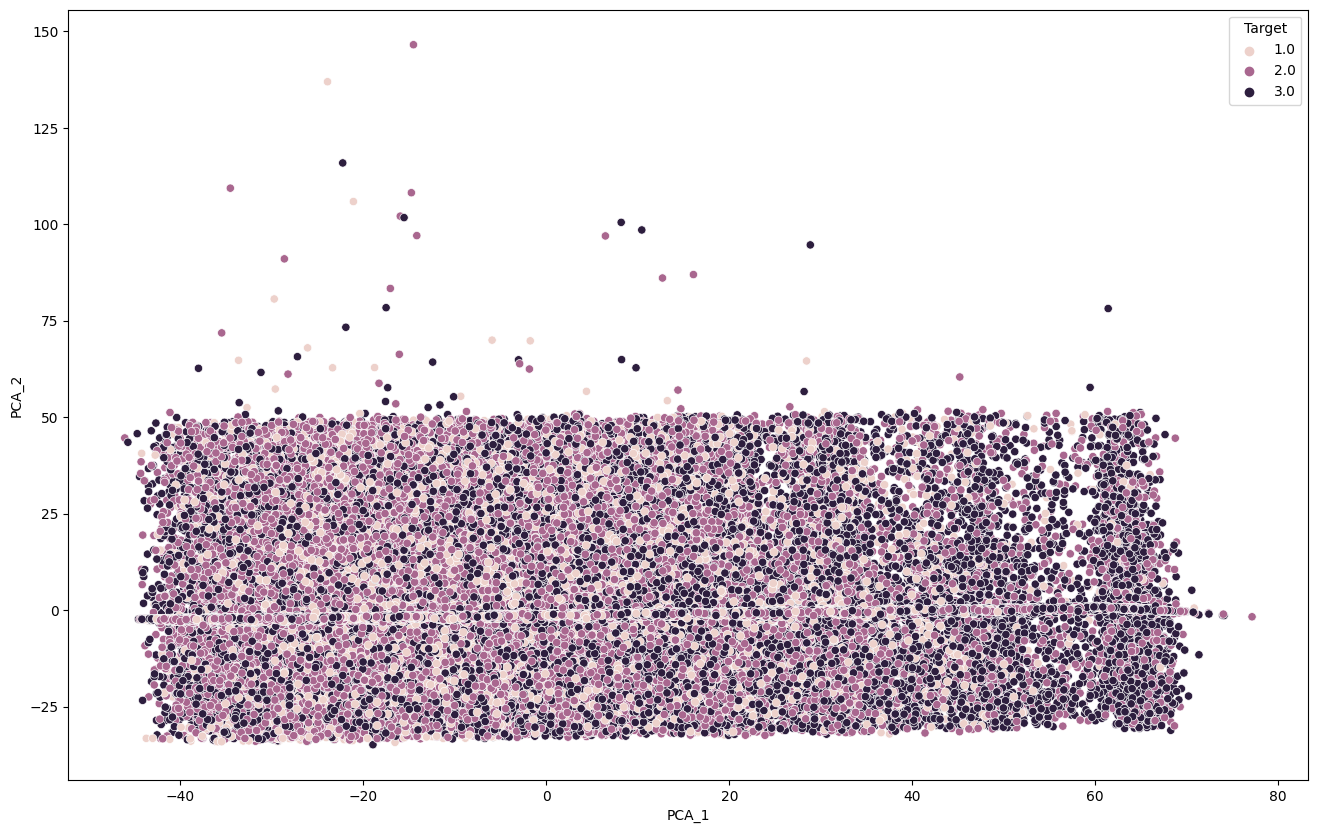

In [10]:
fig = plt.figure()

fig.set_size_inches(16,10)

sns.scatterplot(corred_graph_2d_df, x="PCA_1", y="PCA_2", hue="Target")

plt.show()

In [11]:
### Your code is here

pca_3d = PCA(n_components=3)

pca_3d_array = pca_3d.fit_transform(X_centered)

pca_3d_df = pd.DataFrame(pca_3d_array, columns=["pca_1", "pca_2", "pca_3"])

pca_3d_df


,pca_1,pca_2,pca_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348
...,...,...,...
131657,-32.267779,-2.482906,3.955203
131658,32.621206,-0.886322,11.438623
131659,-4.045367,-1.565545,-0.451941
131660,3.696395,-15.487904,3.655981


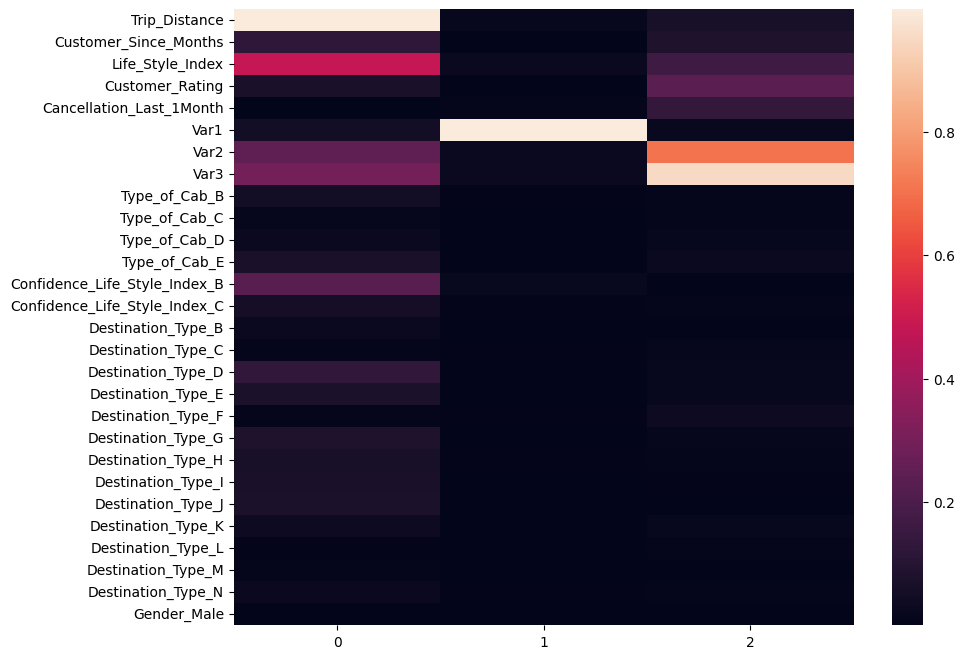

In [12]:
corr1_comp_3d = X.corrwith(pca_3d_df["pca_1"])
corr2_comp_3d = X.corrwith(pca_3d_df["pca_2"])
corr3_comp_3d = X.corrwith(pca_3d_df["pca_3"])

corred_3d_df = pd.concat([corr1_comp_3d, corr2_comp_3d, corr3_comp_3d], axis=1)

plt.figure().set_size_inches(10,8)

sns.heatmap(abs(corred_3d_df))

plt.show()

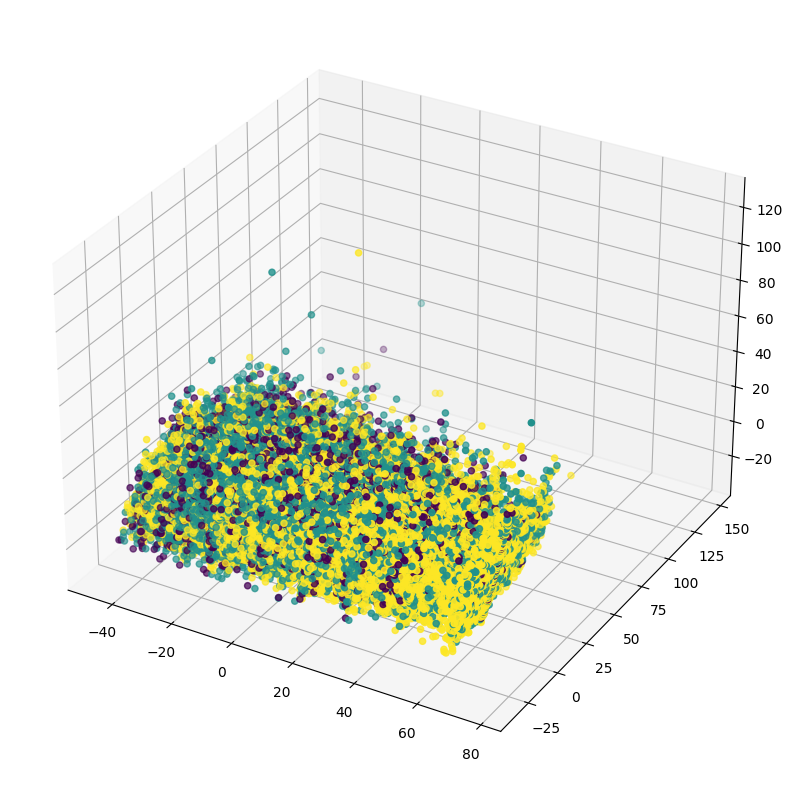

In [13]:
corred_graph_3d = np.concatenate([pca_3d_df.to_numpy(),y.to_numpy().reshape(-1,1)],axis=1)
corred_graph_3d_df = pd.DataFrame(corred_graph_3d, columns=["PCA_1", "PCA_2","PCA_3", "Target"])

colors = ["red", "blue", "purpule"]

plt.figure().set_size_inches(16,10)

ax = plt.axes(projection="3d")

ax.scatter(
    corred_graph_3d_df["PCA_1"],
    corred_graph_3d_df["PCA_2"],
    corred_graph_3d_df["PCA_3"],
    c=corred_graph_3d_df["Target"]
)

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

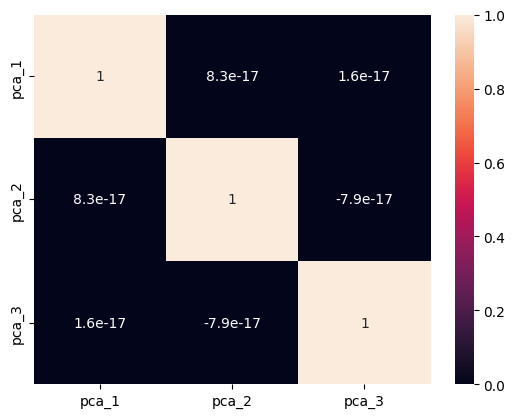

In [14]:
### Your code is here

sns.heatmap(pca_3d_df.corr(), annot=True)
plt.show()

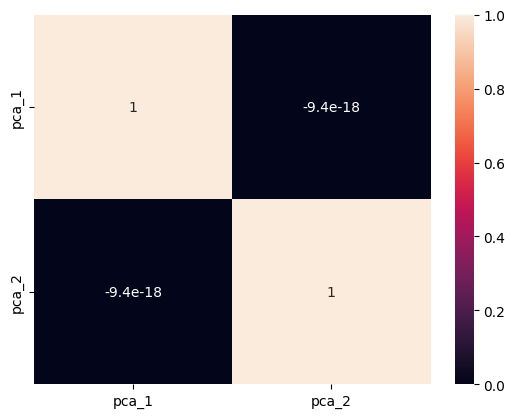

In [15]:
sns.heatmap(pca_2d_df.corr(), annot=True)
plt.show()

<AxesSubplot: >

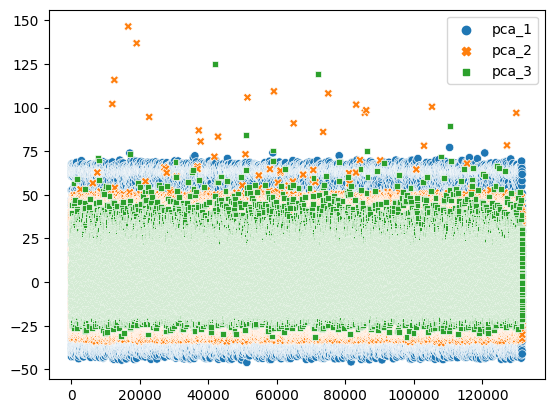

In [16]:
sns.scatterplot(pca_3d_df)

<AxesSubplot: >

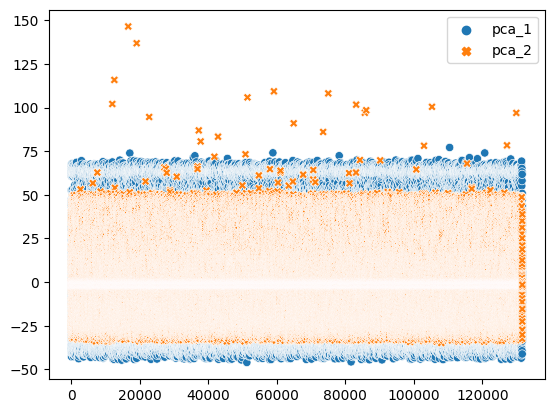

In [17]:
sns.scatterplot(pca_2d_df)

In [18]:
pca_3d_df[["pca_2","pca_3"]].corr()

,pca_2,pca_3
pca_2,1.000000e+00,-7.862238e-17
pca_3,-7.862238e-17,1.000000e+00


<AxesSubplot: >

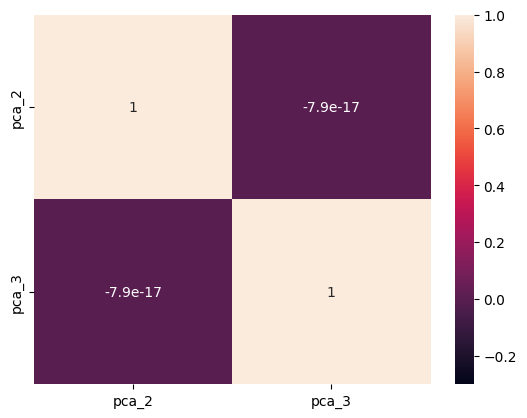

In [19]:
sns.heatmap(pca_3d_df[["pca_2","pca_3"]].corr(), vmax=1, vmin=-0.3, annot=True)

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [20]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [22]:
### Your code is here
def standard_pca_logistic (X_train,X_test,y_train,y_test, pca=True):
    param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
                'model__C': [1e-5, 0.0001, 0.001, 0.01]}

    if pca == True:
        pipe = Pipeline([("scaler", StandardScaler()),("pca",PCA(n_components=2)),("model",LogisticRegression())])
    else:
        pipe = Pipeline([("scaler", StandardScaler()),("model",LogisticRegression())])

    search = GridSearchCV(pipe, param_grid=param_grid, scoring="accuracy")

    search.fit(X_train,y_train)

    return print(classification_report(y_test, search.predict(X_test), digits=3))

In [23]:
standard_pca_logistic(X_train, X_test, y_train, y_test,pca=True)

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333



In [24]:
standard_pca_logistic(X_train, X_test, y_train, y_test,pca=False)

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [25]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True, digits=3)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [26]:
# %%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    acc, f1_score = train_pca_i(n_components=n_components, X_train=X_train, y_train=y_train)
    accuracy_dict[n_components]=acc
    f1_score_dict[n_components]=f1_score

    

In [27]:
round(f1_score_dict[28], ndigits=3)

0.676

In [39]:
for i in accuracy_dict.keys():
    print(f"число компонент:{i} |||", round((accuracy_dict[i] * 100), ndigits=2), "%")

число компонент:2 ||| 48.32 %
число компонент:4 ||| 53.25 %
число компонент:8 ||| 58.52 %
число компонент:16 ||| 59.23 %
число компонент:28 ||| 68.14 %


Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [28]:
from sklearn.manifold import TSNE

### Your code is here



**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [29]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!